In [21]:
import cv2 as cv2 
import numpy as np 
import matplotlib.pyplot as plt 

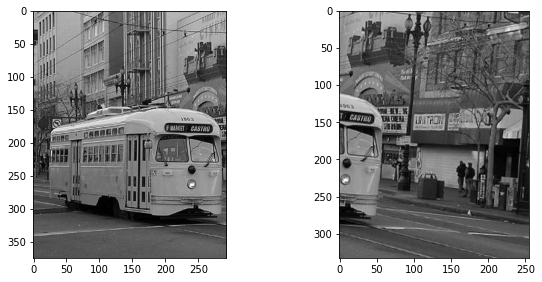

(2.371258497238159, 220.17874145507812)
860
(708, 128)
(860, 128)
[[  0.   0.   0. ...  26.   5.   4.]
 [ 58.  30.   8. ...   0.   0.   0.]
 [  0.   1.  31. ...  15.  10.   4.]
 ...
 [  6.  29.  63. ...   0.   0.   0.]
 [ 14.  24. 111. ...   0.   0.   0.]
 [  0.   1.   0. ...  15.   5.  45.]]
[[124.  30.   0. ...   1.   1.   1.]
 [  0.   0.   0. ...  22.  21.  12.]
 [ 24.  50.  62. ...   0.   0.   0.]
 ...
 [ 63.  35.   4. ...   6.   0.   0.]
 [  4.   1.   1. ...   1.   1.  24.]
 [  3.   0.   0. ...   2.   2.  19.]]


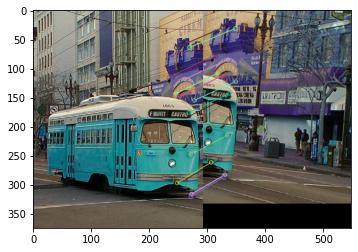

In [22]:
img1 = cv2.imread('data\source001\source001_01.jpg')
img2 = cv2.imread('data\source001\source001_02.jpg')

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


plt.figure(figsize=(10,10))

plt.subplot(221), plt.imshow(gray1, cmap='gray')
plt.subplot(222), plt.imshow(gray2, cmap='gray')

plt.show()

# sifting

sift = cv2.xfeatures2d.SIFT_create()

keypoints_1, descriptors_1 = sift.detectAndCompute(gray1, None)
keypoints_2, descriptors_2 = sift.detectAndCompute(gray2, None)

print(keypoints_1[1].pt) # get the position of key point
print(len(keypoints_2))
print(descriptors_1.shape)
print(descriptors_2.shape)
print(descriptors_1)
print(descriptors_2)

# matching

bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

matches = bf.match(descriptors_1, descriptors_2)
matches = sorted(matches, key = lambda x : x.distance)

# for i in range(1,300,1):
#     print(matches[i].distance) # .distance: get the quality of matching

img3 = cv2.drawMatches(img1, keypoints_1, img2, keypoints_2, matches[:20], img2, flags = 2)

plt.imshow(img3)
plt.show()